In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-data-alchemist-techweek-23/train.csv
/kaggle/input/the-data-alchemist-techweek-23/test.csv
/kaggle/input/the-data-alchemist-techweek-23/sample_solution.csv


In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [3]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] 
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] 
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        returna
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number])
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]]
    columnNames = list(df)
    if len(columnNames) > 10:
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [4]:
df_train = pd.read_csv('/kaggle/input/the-data-alchemist-techweek-23/train.csv')

In [5]:
print(f"The train data set contains {df_train.shape[0]} rows and {df_train.shape[1]} cols")

The train data set contains 266 rows and 51 cols


In [6]:
nRowsRead = 'None'
df_train.dataframeName = 'FootballData.csv'
nRow, nCol = df_train.shape
df_train.head(5)

,id,result,Div,Date,HomeTeam,AwayTeam,Bet365 home odds,Bet365 draw odds,Bet365 away odds,Bet&Win home odds,...,Betbrain max >2.5,Betbrain average >2.5,Betbrain max <2.5,Betbrain average <2.5,Betbrain Asian bookies,Betbrain Asian home handicap,Betbrain max Asian home odds,Betbrain average Asian home odds,Betbrain max Asian away odds,Betbrain average Asian away odds
0,97,A,E0,29-10-2021,France,Belgium,2.1,3.20,3.5,2.05,...,2.40,2.04,1.80,1.71,29,-0.25,2.04,1.94,1.98,1.92
1,86,H,E0,22-10-2021,Argentina,South Korea,1.5,3.75,7.0,1.40,...,2.03,1.91,1.91,1.80,27,-1.00,1.95,1.88,2.08,1.96
2,46,D,E0,17-09-2021,Netherlands,Costa Rica,2.6,3.25,2.6,2.30,...,2.32,2.11,1.71,1.65,26,0.00,2.00,1.92,1.97,1.91
3,180,D,E0,28-12-2021,England,Netherlands,2.1,3.25,3.4,2.10,...,2.15,2.02,1.76,1.70,23,-0.25,1.92,1.88,2.01,1.98
4,266,A,E0,26-02-2022,Cameroon,USA,2.4,3.25,2.8,2.40,...,2.20,2.04,1.80,1.70,19,0.00,1.80,1.76,2.14,2.05


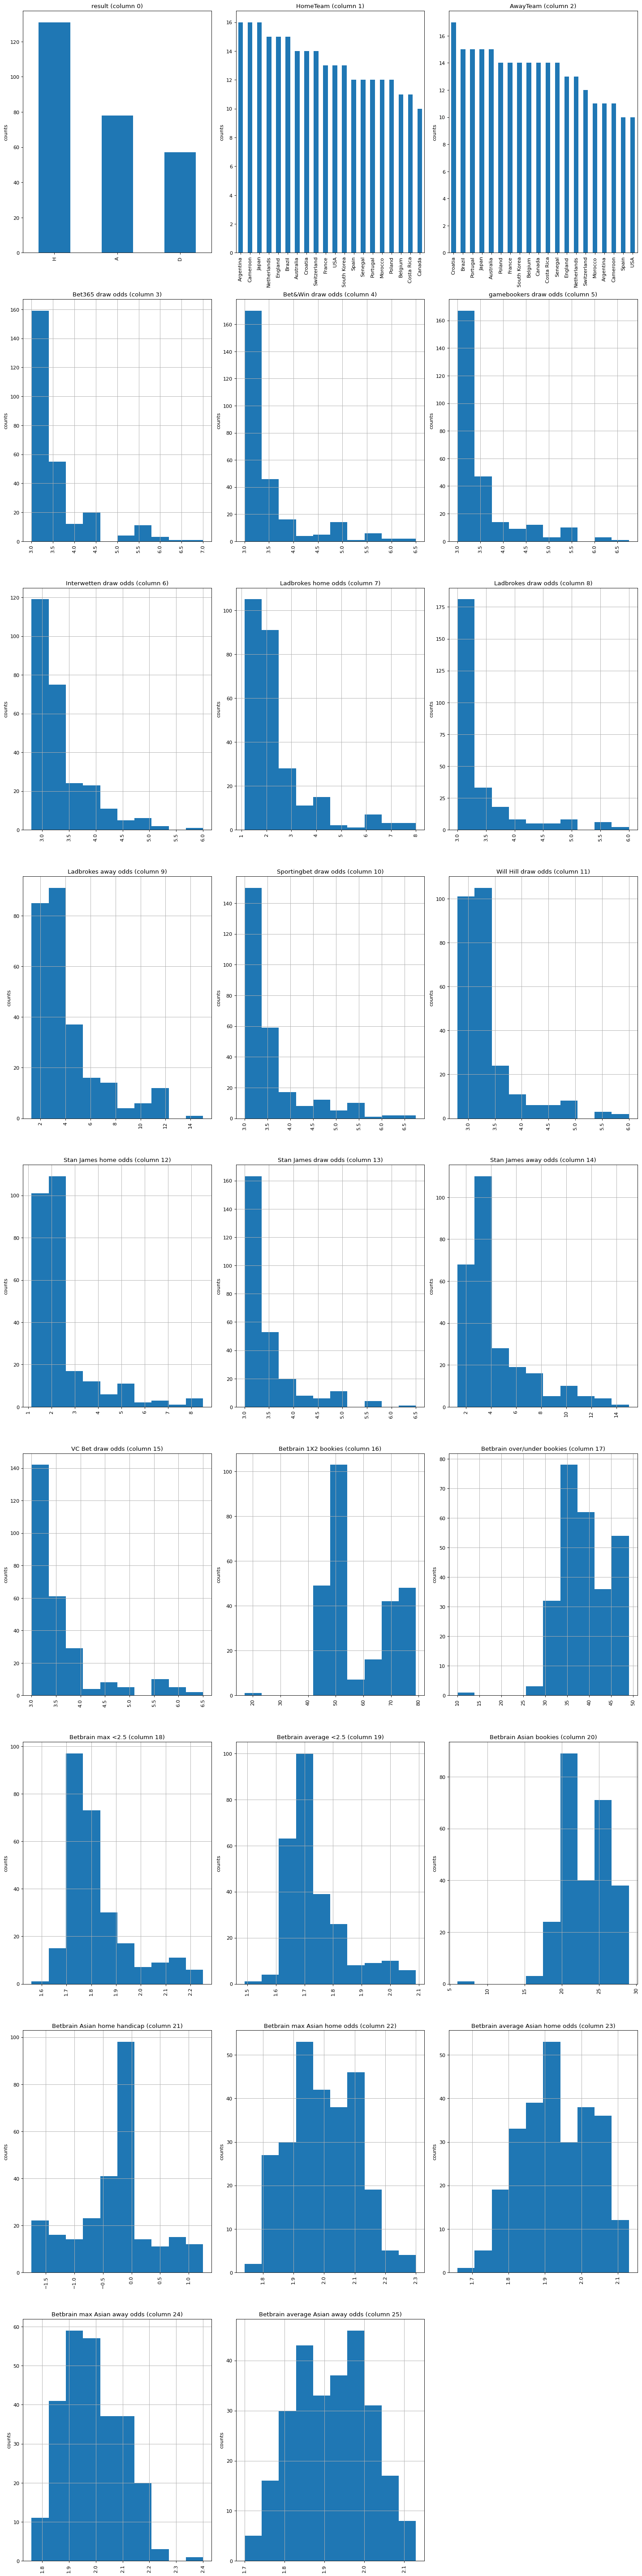

In [7]:
plotPerColumnDistribution(df_train, 52, 3)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only


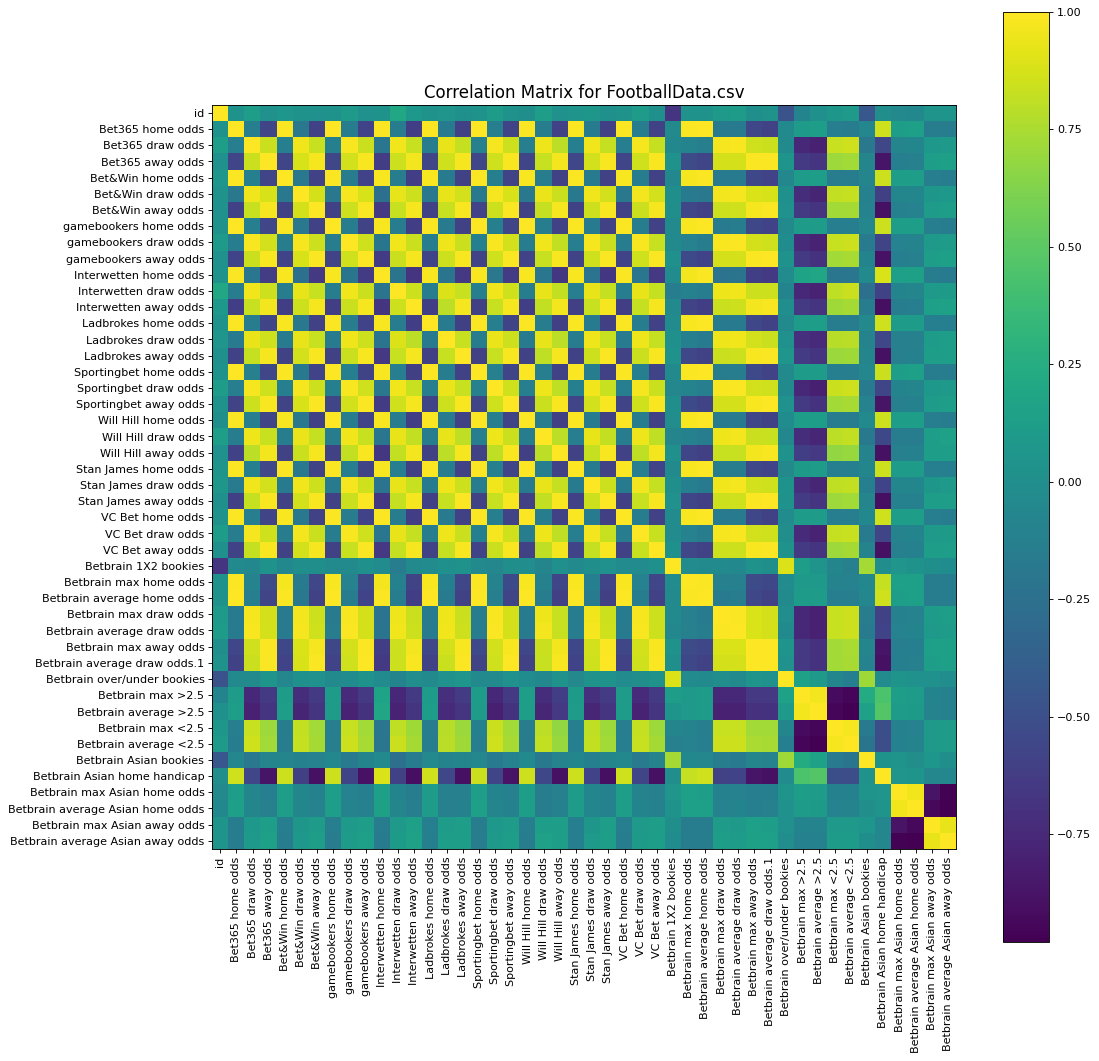

In [8]:
plotCorrelationMatrix(df_train, 15)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:43: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only


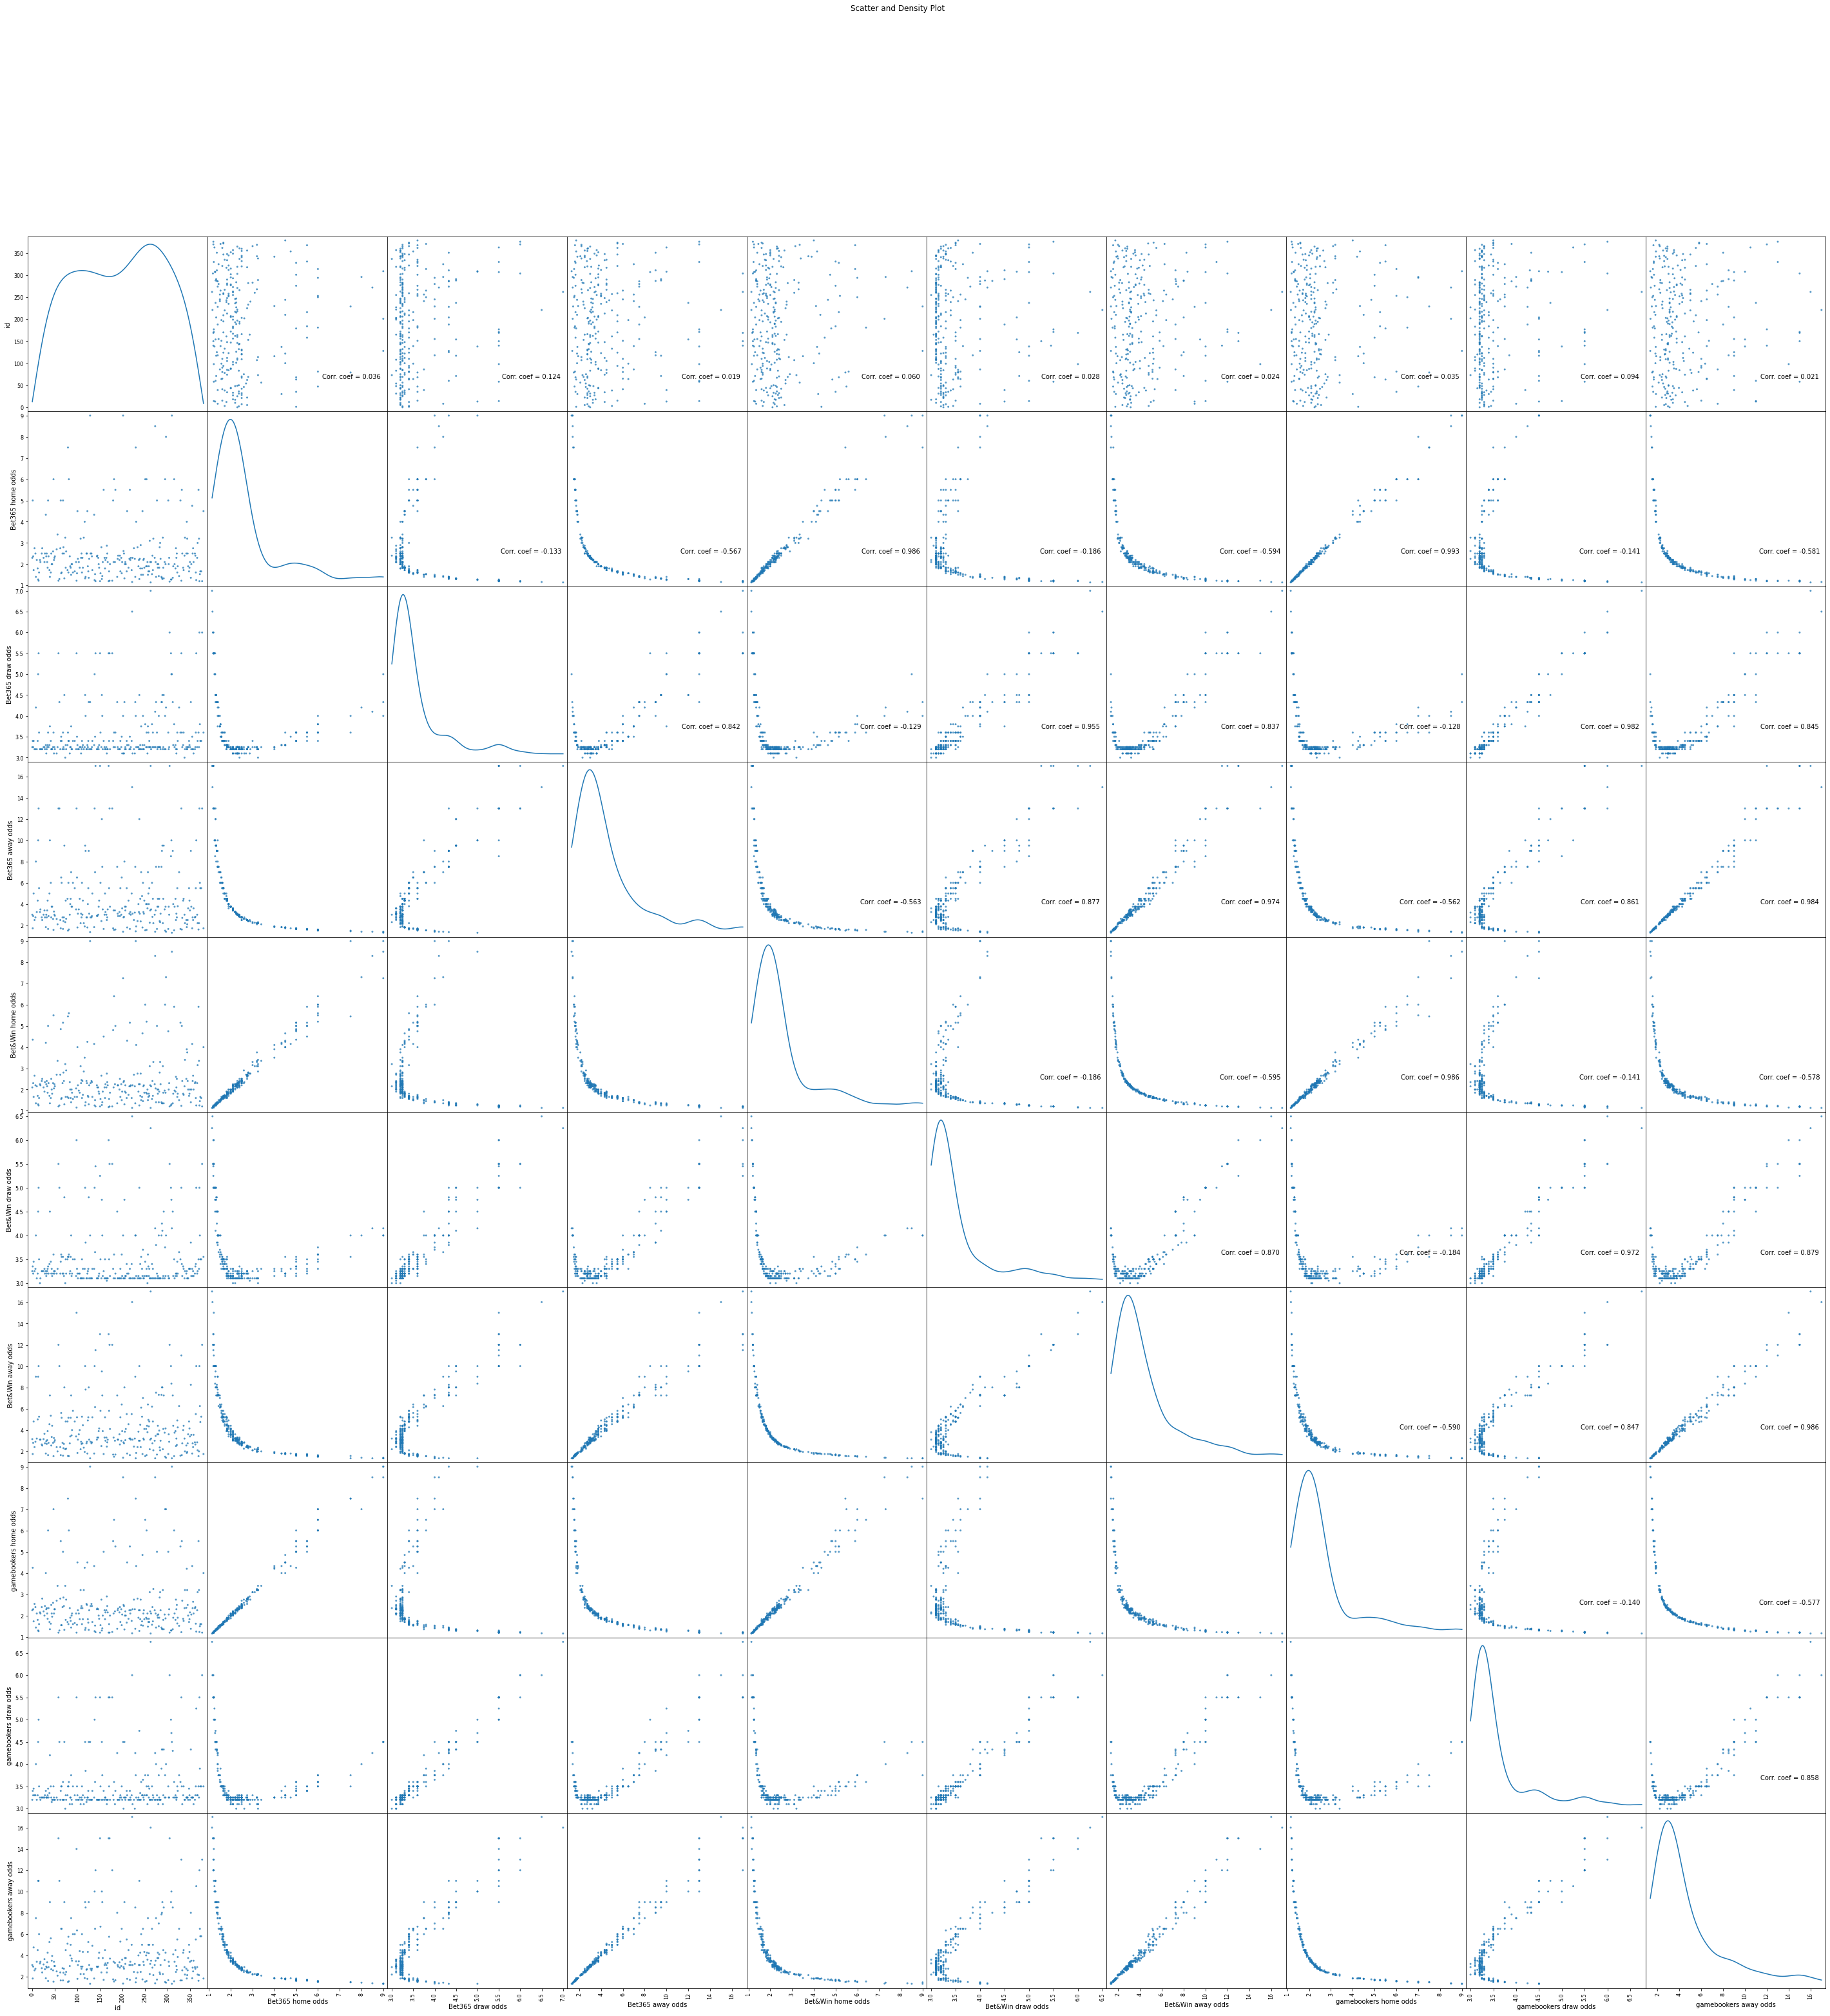

In [9]:
plotScatterMatrix(df_train, 50, 10)

In [10]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_train['Div_Cat'] = labelencoder.fit_transform(df_train['Div'])
df_train['Date_Cat'] = labelencoder.fit_transform(df_train['Date'])
df_train['HomeTeam_Cat'] = labelencoder.fit_transform(df_train['HomeTeam'])
df_train['result_cat'] = labelencoder.fit_transform(df_train['result'])
list(labelencoder.classes_)

['A', 'D', 'H']

In [11]:

df_train['AwayTeam_Cat'] = labelencoder.fit_transform(df_train['AwayTeam'])
df_train.drop(['Div','Date','HomeTeam','AwayTeam','result'],axis=1,inplace=True)

In [12]:
cor_matrix = df_train.corr().abs()
print(cor_matrix)

                                        id  Bet365 home odds  \
id                                1.000000          0.035550   
Bet365 home odds                  0.035550          1.000000   
Bet365 draw odds                  0.124160          0.132768   
Bet365 away odds                  0.019072          0.566687   
Bet&Win home odds                 0.059714          0.986309   
Bet&Win draw odds                 0.028041          0.186237   
Bet&Win away odds                 0.023659          0.593774   
gamebookers home odds             0.035367          0.993317   
gamebookers draw odds             0.093806          0.141060   
gamebookers away odds             0.020949          0.580572   
Interwetten home odds             0.035243          0.985097   
Interwetten draw odds             0.209813          0.146067   
Interwetten away odds             0.073843          0.614537   
Ladbrokes home odds               0.026461          0.986445   
Ladbrokes draw odds               0.0526

In [13]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
print(upper_tri)

                                  id  Bet365 home odds  Bet365 draw odds  \
id                               NaN           0.03555          0.124160   
Bet365 home odds                 NaN               NaN          0.132768   
Bet365 draw odds                 NaN               NaN               NaN   
Bet365 away odds                 NaN               NaN               NaN   
Bet&Win home odds                NaN               NaN               NaN   
Bet&Win draw odds                NaN               NaN               NaN   
Bet&Win away odds                NaN               NaN               NaN   
gamebookers home odds            NaN               NaN               NaN   
gamebookers draw odds            NaN               NaN               NaN   
gamebookers away odds            NaN               NaN               NaN   
Interwetten home odds            NaN               NaN               NaN   
Interwetten draw odds            NaN               NaN               NaN   
Interwetten 

In [14]:
to_drop = [column for column in upper_tri.columns if any((upper_tri[column] > 0.85)&(upper_tri[column] <0.9))]
to_drop

['Bet&Win draw odds',
 'Bet&Win away odds',
 'gamebookers draw odds',
 'gamebookers away odds',
 'Interwetten away odds',
 'Ladbrokes draw odds',
 'Ladbrokes away odds',
 'Sportingbet draw odds',
 'Sportingbet away odds',
 'Stan James draw odds',
 'Stan James away odds',
 'VC Bet draw odds',
 'VC Bet away odds',
 'Betbrain max draw odds',
 'Betbrain average draw odds',
 'Betbrain max away odds',
 'Betbrain average draw odds.1',
 'Betbrain over/under bookies',
 'Betbrain average <2.5',
 'Betbrain Asian home handicap',
 'Betbrain max Asian away odds']

In [15]:
df_train

,id,Bet365 home odds,Bet365 draw odds,Bet365 away odds,Bet&Win home odds,Bet&Win draw odds,Bet&Win away odds,gamebookers home odds,gamebookers draw odds,gamebookers away odds,...,Betbrain Asian home handicap,Betbrain max Asian home odds,Betbrain average Asian home odds,Betbrain max Asian away odds,Betbrain average Asian away odds,Div_Cat,Date_Cat,HomeTeam_Cat,result_cat,AwayTeam_Cat
0,97,2.1,3.20,3.50,2.05,3.15,3.40,2.10,3.20,3.45,...,-0.25,2.04,1.94,1.98,1.92,0,88,9,0,2
1,86,1.5,3.75,7.00,1.40,4.00,7.25,1.44,3.75,7.50,...,-1.00,1.95,1.88,2.08,1.96,0,67,0,2,16
2,46,2.6,3.25,2.60,2.30,3.20,2.80,2.60,3.20,2.60,...,0.00,2.00,1.92,1.97,1.91,0,50,12,1,6
3,180,2.1,3.25,3.40,2.10,3.10,3.30,2.10,3.20,3.40,...,-0.25,1.92,1.88,2.01,1.98,0,85,8,1,12
4,266,2.4,3.25,2.80,2.40,3.10,2.75,2.40,3.20,2.85,...,0.00,1.80,1.76,2.14,2.05,0,76,4,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,368,5.5,3.60,1.61,5.90,3.50,1.55,5.50,3.50,1.62,...,0.75,2.08,2.05,1.86,1.81,0,23,16,0,0
262,48,2.2,3.10,3.30,2.05,3.25,3.25,2.10,3.25,3.40,...,-0.25,1.95,1.89,2.02,1.97,0,50,8,0,14
263,260,3.1,3.25,2.25,3.10,3.10,2.20,3.10,3.20,2.25,...,0.25,1.91,1.89,2.03,1.98,0,73,1,2,0
264,312,1.9,3.30,4.00,1.80,3.15,4.40,1.90,3.25,4.10,...,-0.50,2.00,1.96,1.93,1.89,0,14,8,0,3


In [16]:
df_train.drop(['Bet&Win draw odds','Bet&Win away odds','gamebookers draw odds','VC Bet away odds','Betbrain max draw odds','Betbrain average draw odds','Betbrain max away odds','Betbrain average draw odds.1','Betbrain over/under bookies','Betbrain average <2.5','Betbrain Asian home handicap','Betbrain max Asian away odds'], axis=1, inplace=True)

In [17]:
df_train

,id,Bet365 home odds,Bet365 draw odds,Bet365 away odds,Bet&Win home odds,gamebookers home odds,gamebookers away odds,Interwetten home odds,Interwetten draw odds,Interwetten away odds,...,Betbrain max <2.5,Betbrain Asian bookies,Betbrain max Asian home odds,Betbrain average Asian home odds,Betbrain average Asian away odds,Div_Cat,Date_Cat,HomeTeam_Cat,result_cat,AwayTeam_Cat
0,97,2.1,3.20,3.50,2.05,2.10,3.45,2.00,3.1,3.2,...,1.80,29,2.04,1.94,1.92,0,88,9,0,2
1,86,1.5,3.75,7.00,1.40,1.44,7.50,1.50,3.7,5.7,...,1.91,27,1.95,1.88,1.96,0,67,0,2,16
2,46,2.6,3.25,2.60,2.30,2.60,2.60,2.40,3.0,2.6,...,1.71,26,2.00,1.92,1.91,0,50,12,1,6
3,180,2.1,3.25,3.40,2.10,2.10,3.40,2.10,3.0,3.1,...,1.76,23,1.92,1.88,1.98,0,85,8,1,12
4,266,2.4,3.25,2.80,2.40,2.40,2.85,2.40,3.1,2.7,...,1.80,19,1.80,1.76,2.05,0,76,4,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,368,5.5,3.60,1.61,5.90,5.50,1.62,4.80,3.6,1.6,...,1.80,20,2.08,2.05,1.81,0,23,16,0,0
262,48,2.2,3.10,3.30,2.05,2.10,3.40,2.10,3.0,3.1,...,1.80,27,1.95,1.89,1.97,0,50,8,0,14
263,260,3.1,3.25,2.25,3.10,3.10,2.25,2.80,3.1,2.3,...,1.70,21,1.91,1.89,1.98,0,73,1,2,0
264,312,1.9,3.30,4.00,1.80,1.90,4.10,1.80,3.2,4.0,...,2.03,21,2.00,1.96,1.89,0,14,8,0,3


In [18]:
X=df_train.drop(['result_cat'],axis=1)
y=df_train['result_cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
from sklearn.svm import NuSVC
a = NuSVC()
a.fit(X_train,y_train)

NuSVC()

In [20]:
X1_test=pd.read_csv('/kaggle/input/the-data-alchemist-techweek-23/test.csv')
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X1_test['Div_Cat'] = labelencoder.fit_transform(X1_test['Div'])
X1_test['Date_Cat'] = labelencoder.fit_transform(X1_test['Date'])
X1_test['HomeTeam_Cat'] = labelencoder.fit_transform(X1_test['HomeTeam'])
X1_test['AwayTeam_Cat'] = labelencoder.fit_transform(X1_test['AwayTeam'])


In [21]:
X1_test.drop(['Bet&Win draw odds','Bet&Win away odds','gamebookers draw odds','VC Bet away odds','Betbrain max draw odds','Betbrain average draw odds','Betbrain max away odds','Betbrain average draw odds.1','Betbrain over/under bookies','Betbrain average <2.5','Betbrain Asian home handicap','Betbrain max Asian away odds'], axis=1, inplace=True)

In [22]:
X1_test.drop(['Div','Date','HomeTeam','AwayTeam'],axis=1,inplace=True)
predictions = a.predict(X1_test)
predictions

array([1, 2, 0, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 0, 2, 2, 2, 1, 0, 1,
       1, 0, 2, 2, 2, 2, 0, 1, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 1, 2, 2, 0, 0, 1, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 0, 0, 0, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 0, 2, 1, 2,
       0, 2, 2, 0])

In [23]:
x_n=np.array(predictions)
x_n

array([1, 2, 0, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 0, 2, 2, 2, 1, 0, 1,
       1, 0, 2, 2, 2, 2, 0, 1, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 1, 2, 2, 0, 0, 1, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 0, 0, 0, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 0, 2, 1, 2,
       0, 2, 2, 0])

In [24]:
df_n = pd.DataFrame(x_n, columns = ['Result'])


In [25]:
df_n

,Result
0,1
1,2
2,0
3,1
4,2
...,...
109,2
110,0
111,2
112,2


In [26]:
df_n['Result'] = df_n['Result'].replace([0, 1,2], ['A', 'D','H'])

In [27]:
df_n

,Result
0,D
1,H
2,A
3,D
4,H
...,...
109,H
110,A
111,H
112,H


In [28]:
output = pd.DataFrame({'id': X1_test.id,
                       'result': df_n.Result})


In [29]:
output

,id,result
0,336,D
1,104,H
2,40,A
3,364,D
4,234,H
...,...,...
109,102,H
110,178,A
111,76,H
112,200,H


In [30]:
output.to_csv('submission96.csv', index=False)